In [1]:
## 2021.09.24 Exercise 1
## Linear regression with one variable

## 0 说明
# 应用单因素线性回归来预测food truck的利润
# file ex1data1.txt contains the dataset for our linear regression problem

# The first column is the population of a city and the second column is 
# the profit of a food truck in that city. A negative value for profit indicates a loss

In [2]:
getwd()

## R中矩阵内积(inner product/点乘) a*b 
## R中矩阵外积（叉乘）a%*%b

[1] "G:/project/Coursera-ML-AndrewNg-Notes/My_MLcourse_codes"

[1] "row number=96 column number=2"


,X6.1101,X17.592
,<dbl>,<dbl>
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860


[1] "X6.1101" "X17.592"

96 96

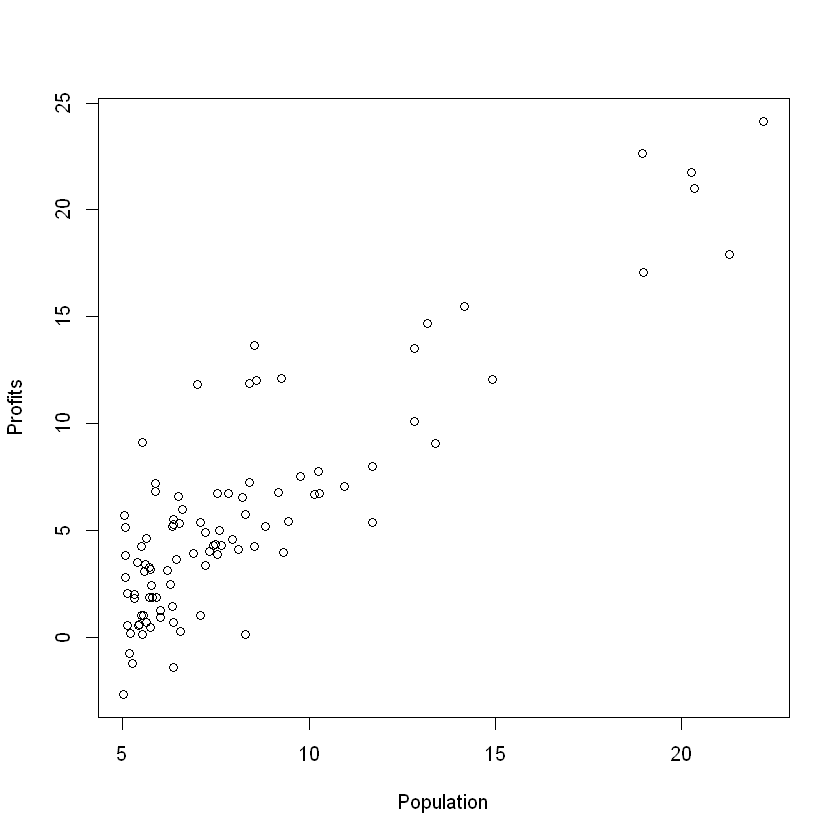

In [3]:
## 1 load data ex1data1.txt
ex1data1=read.table(file = 'G:\\project\\Coursera-ML-AndrewNg-Notes\\code\\ex1-linear regression\\ex1data1.txt',header = T,sep = ',',stringsAsFactors = F)

print(paste0("row number=",nrow(ex1data1)," column number=",ncol(ex1data1))) ## "row number=96 column number=2"
ex1data1[1:5,1:2]
colnames(ex1data1)

## 将data.frame拆成X和Y两个列向量
X=as.vector(ex1data1[,1])
Y=as.vector(ex1data1[,2])
cat(length(X),length(Y))

## 简单的用一个散点图画出他们的关系
plot(x=X,y = Y,xlab = "Population",ylab="Profits")

In [4]:
## Gradient Descent 梯度下降

## 向量化表示数据
## 我们对于X矩阵，用行来表示一个个实例x^(i)，每一列是一个features，xj。
## 设X有m个实例，n个features，X为m*(n+1)的矩阵（这里只有一个feature，所以X就是一个一维向量）（其中，第一个features都为1，表示bias terms）

## 对于Y矩阵，就是y^(i)组成的列向量，Y是一个m*1的向量

## 对于参数Theta，对于每一个features都有一个对应的权重（weight）或者称为参数（Parameter）,因此Theta是一个(n+1)*1的向量（其中第一个为θ0，表示截距）

## function for adding bias term
adding_bias_term=function(X){
    X_mat=matrix(NA,nrow = length(X),ncol = 2)
    X_mat=as.data.frame(X_mat)
    X_mat$x0=rep(1,nrow(X_mat))
    X_mat$x1=X
    X_mat=X_mat[,-c(1,2)]
    return(as.matrix(X_mat))
}

X_mat=adding_bias_term(X)
head(X_mat)

x0,x1
1,5.5277
1,8.5186
1,7.0032
1,5.8598
1,8.3829
1,7.4764


In [5]:
## rand initiate Theta

rand_init_theta=function(Theta){
    Theta=c()

    for(i in 1:ncol(X_mat)){
    Theta=c(Theta,runif(1,0,1))
    }
    Theta=as.matrix(Theta)
    return (as.matrix(Theta))
}
Theta=rand_init_theta(Theta)


In [6]:
## function of hypothesis h_theta_x

h_theta_x=function(X_mat,Theta){
    return (X_mat%*%Theta)
}

In [7]:
## function of calculate loss function(J(θ))
cal_Loss_function=function(X_mat,Y,Theta){
    m=nrow(X_mat)
    
    return (sum((h_theta_x(X_mat,Theta)-Y)^2)/(2*m))
}

test_loss_term=cal_Loss_function(X_mat,Y,Theta)

In [8]:
## gradient descent
gradient_descent=function(X_mat,Y,Theta,alapa){
    Theta_new=as.matrix(rep(NA,nrow(Theta)))
    m=nrow(X_mat)

    Theta_new=Theta-alapa/m*t(X_mat)%*%(h_theta_x(X_mat,Theta)-Y)
    
    return (Theta_new)
}

In [9]:
## visulize J(θ) and epoch
epoch=c()
Loss_term=c()
for(i in 1:50){
    epoch=c(epoch,i)
    Loss_term_tem=cal_Loss_function(X_mat,Y,Theta)
    Loss_term=c(Loss_term,Loss_term_tem)
    Theta=gradient_descent(X_mat,Y,Theta,0.001)
}

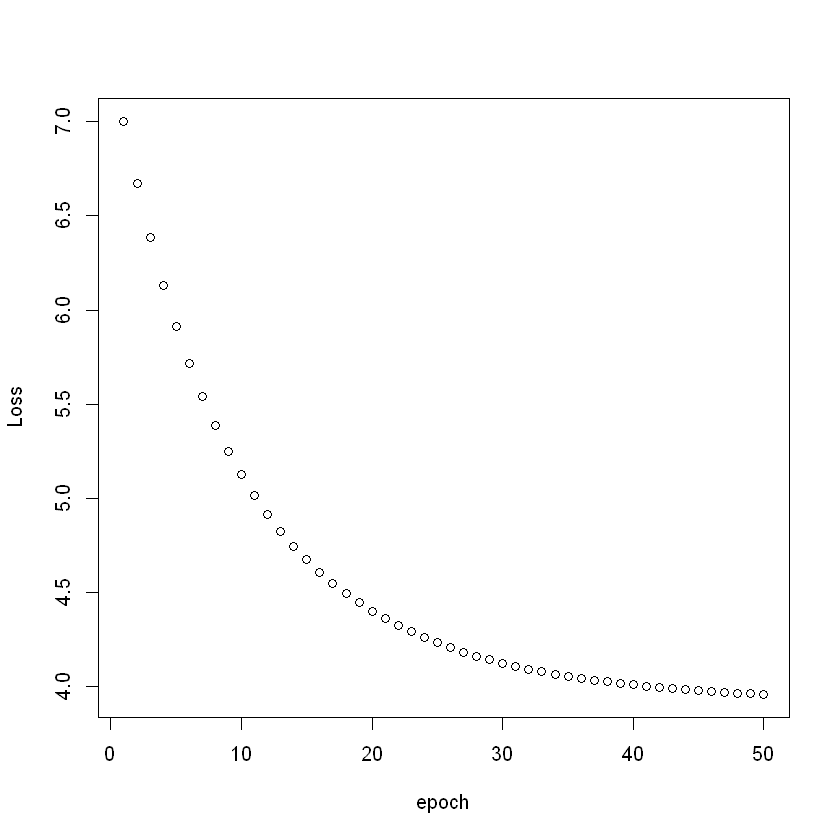

In [10]:
## plot
plot_mat=data.frame("epoch"=epoch,"Loss_term"=Loss_term)

plot(x=plot_mat$epoch,y = plot_mat$Loss_term,xlab = "epoch",ylab="Loss")